![Gesund](https://egirisim.com/wp-content/uploads/2023/08/gesund-ai-1068x580.jpg)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gesund-ai/gesund/blob/main/gesund/examples/semantic_segmentation_brain_cancer.ipynb)

# Semantic Segmentation on Brain Cancer Dataset

This notebook provides and example of Gesund Validation with Segmentation

The notebook could be outlined as follows

- [Introduction](#intro)
- [Data Source](#data_source)
- [Basic Usage](#usage)
- [Explore Results](#results)

## <a id='intro'>Introduction</a>


To learn more about Gesundai Validation tool, Please visit the link <a href="https://gesund-ai.github.io/#gesund-ai">here</a>.

Please ensure you have installed the as per the installation instructions <a href="https://gesund-ai.github.io/user_guide.html#installation">here</a>.




## <a id='data_source'>Data Source</a>

### Official Dataset: [Brain Tumor Segmentation(BraTS2020)](https://www.kaggle.com/datasets/awsaf49/brats2020-training-data)

### Dataset on Gesund Platform: [Brats-3D Brain Tumour Segmentation Dataset](https://app.gesund.ai/data/dataset-details/dataset_667ecb5eb8a1ee0b39b4517f/overview)

### Example image in the dataset 

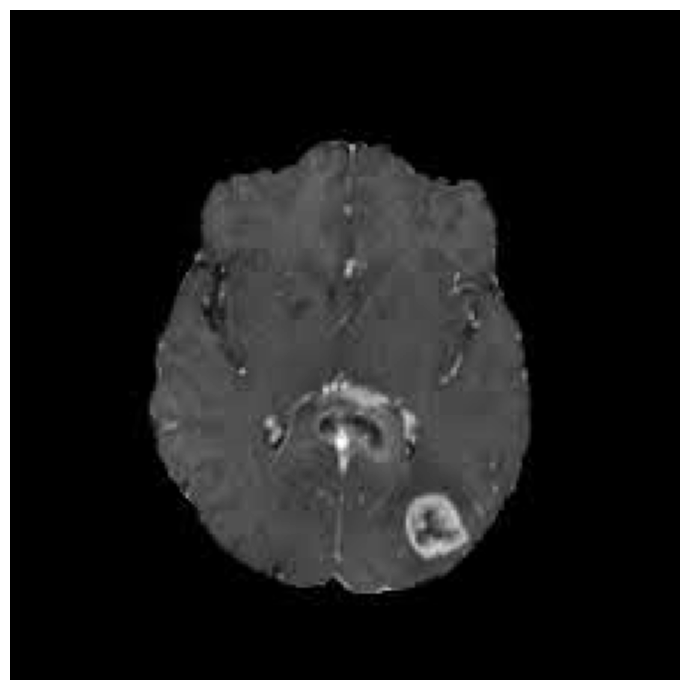

In [13]:
import os
import warnings

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")


def show_image_in_dataset(image_path):
    """
    Displays an image from the dataset.

    :param image_path: Path to the image file.
    """

    full_image_path = os.path.expanduser(image_path)
    fig, ax = plt.subplots(figsize=(10, 7))
    img = mpimg.imread(full_image_path)
    if img.ndim == 2:  
        ax.imshow(img, cmap='gray')            
    ax.axis('off')
    plt.tight_layout()
    plt.show()

show_image_in_dataset("~/gesund/gesund/assets/example_image_of_Brats20.png")

### To download the required JSON files, run the following commands in a Jupyter notebook cell


In [1]:
# Segmentation Annotation Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/semantic_segmentation/gesund_custom_format/annotation.json

# Segmentation Prediction Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/semantic_segmentation/gesund_custom_format/prediction.json

# Segmentation Mappings
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/semantic_segmentation/test_class_mappings.json

--2024-12-24 11:59:54--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/semantic_segmentation/gesund_custom_format/annotation.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67241 (66K) [text/plain]
Saving to: ‘annotation.json’

annotation.json     100%[===================>]  65.67K  --.-KB/s    in 0.01s   

2024-12-24 11:59:54 (5.24 MB/s) - ‘annotation.json’ saved [67241/67241]

--2024-12-24 11:59:56--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/tests/_data/semantic_segmentation/gesund_custom_format/prediction.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.

### A sample of Annotation, Prediction, and Class Mappings JSON files for Segmentation

In [6]:
import json

def preview_jsons(file_path, preview_lines=22):
    try:
        with open(file_path, 'r') as file:
            for _ in range(preview_lines):
                line = file.readline().strip()
                if line:
                    print(line)

        with open(file_path, 'r') as file:
            data = json.load(file)
        return data

    except FileNotFoundError:
        raise FileNotFoundError(f"The file '{file_path}' was not found.")

json_files = [
    'annotation.json',
    'prediction.json',
    'test_class_mappings.json'
]
for json_file in json_files:
    try:
        print("-" * 50)
        print(f"Previewing {json_file}:")
        json_data = preview_jsons(json_file)
    except Exception as e:
        print(e, "\n")

--------------------------------------------------
Previewing annotation.json:
{
"663a089b2afdf0845f7f94f5": {
"image_id": "663a089b2afdf0845f7f94f5",
"annotation": [
{
"image_id": "663a089b2afdf0845f7f94f5",
"label": 1,
"type": "mask",
"measurement_info": {
"objectName": "mask",
"measurement": "Segmentation"
},
"mask": {
"mask": "20753 2 20992 5 21231 8 21471 8 21711 9 21950 11 22190 8 22199 2 22431 7 22671 7 22912 6 23152 5 23392 4 23632 3 26281 1"
},
"shape": [
240,
240
],
"window_level": null
},
{
--------------------------------------------------
Previewing prediction.json:
{
"663a089b2afdf0845f7f94f5": {
"image_id": "663a089b2afdf0845f7f94f5",
"masks": {
"rles": [
{
"rle": "20753 2 20992 5 21231 8 21471 8 21711 9 21950 11 22190 8 22199 2 22431 7 22671 7 22912 6 23152 5 23392 4 23632 3 26281 1",
"class": 1
},
{
"rle": "27446 1 27465 2 27686 1 27705 2 27926 3 27935 1 27945 1 28166 12 28406 12 28424 2 28646 13 28661 5 28885 22 29125 23 29365 23 29606 22 29847 21 30077 1 30087 20 303

## <a id='usage'> Basic Usage </a>

It is couple of simple lines of code to run `semantic segmentation validation` on your data. 

In [2]:
from gesund import Validation
from gesund.validation._result import ValidationResult
from gesund.core._managers.metric_manager import metric_manager
from gesund.core._managers.plot_manager import plot_manager


In [14]:
def plot_config(problem_type):
    plot_configs = {
        "classification": {
            "class_distributions": {
                "metrics": ["normal", "pneumonia"],
                "threshold": 10,
            },
            "blind_spot": {"class_type": ["Average", "1", "0"]},
            "performance_by_threshold": {
                "graph_type": "graph_1",
                "metrics": [
                    "F1",
                    "Sensitivity",
                    "Specificity",
                    "Precision",
                    "FPR",
                    "FNR",
                ],
                "threshold": 0.2,
            },
            "roc": {"roc_class": ["normal", "pneumonia"]},
            "precision_recall": {"pr_class": ["normal", "pneumonia"]},
            "confidence_histogram": {"metrics": ["TP", "FP"], "threshold": 0.5},
            "overall_metrics": {"metrics": ["AUC", "Precision"], "threshold": 0.2},
            "confusion_matrix": {},
            "prediction_dataset_distribution": {},
            "most_confused_bar": {},
            "confidence_histogram_scatter_distribution": {},
            "lift_chart": {},
        },
        "object_detection": {
            "mixed_plot": {"mixed_plot": ["map10", "map50", "map75"], "threshold": 0.5},
            "top_misses": {"min_miou": 0.70, "top_n": 10},
            "confidence_histogram": {"confidence_histogram_labels": ["TP", "FP"]},
            "classbased_table": {
                "classbased_table_metrics": ["precision", "recall", "f1"],
                "threshold": 0.2,
            },
            "overall_metrics": {
                "overall_metrics_metrics": ["map", "mar"],
                "threshold": 0.5,
            },
            "blind_spot": {
                "blind_spot_Average": ["mAP@50", "mAP@10", "mAR@max=10", "mAR@max=100"],
                "threshold": 0.5,
            },
        },
        "semantic_segmentation": {
            "violin_graph": {"metrics": ["Acc", "Spec", "AUC"], "threshold": 0.5},
            "plot_by_meta_data": {
                "meta_data_args": [
                    "FalsePositive",
                    "Dice Score",
                    "mean Sensitivity",
                    "mean AUC",
                    "Precision",
                    "AverageHausdorffDistance",
                    "SimpleHausdorffDistance",
                ]
            },
            "overall_metrics": {
                "overall_args": ["mean AUC", "fwIoU", "mean Sensitivity"]
            },
            "classbased_table": {"classbased_table_args": 0.5},
            "blind_spot": {
                "blind_spot_args": [
                    "fwIoU",
                    "mean IoU",
                    "mean Sensitivity",
                    "mean Specificity",
                    "mean Kappa",
                    "mean AUC",
                    "",
                ]
            },
        },
    }
    return plot_configs[problem_type]

In [ ]:
metric_name = "predicted_distribution"
cohort_id = None
problem_type = "semantic_segmentation"
data_dir = f"./tests/_data/{problem_type}"


validator = Validation(
    annotations_path=f"{data_dir}/gesund_custom_format/annotation.json",
    predictions_path=f"{data_dir}/gesund_custom_format/prediction.json",
    class_mapping=f"{data_dir}/test_class_mappings.json",
    problem_type=problem_type,
    data_format="json",
    json_structure_type="gesund",
    plot_config=plot_config(problem_type),
    cohort_args={"selection_criteria": "random"},
    metric_args={"threshold": [0.25, 0.5, 0.75]},
)

validation_results = validator.run()



In [ ]:
validation_results.plot(metric_name=metric_name, save_plot=False, cohort_id=cohort_id)

In [ ]:
validation_results.save(metric_name)

In [ ]:
validation_results.__dict__.keys()

#### Class instance attributes

<hr />

1. `data`: A pydantic model following the *UserInputData* that contains all the loaded user data.

2. `user_params`: A pydantic model following the schema *UserInputParams* that contains all the parameters provided.

3. `result`: Stores all computed outputs.

4. `cohort_args`: Defines how subsets of data are chosen for processing.

5. `plot_args`: Holds parameters for customizing the generated plots.


<hr />

In [ ]:
validation_results.plot(metric_name='iou_distribution', save_plot=False, cohort_id=cohort_id)

In [ ]:
validation_results.plot(metric_name='dice_distribution', save_plot=False, cohort_id=cohort_id)